In [1]:
%reset -f
# libraires librosa jouer avec des audios
import librosa
import librosa.display

# libraires jouer des audios
import soundfile as sf
import sounddevice as sd

# libraires jouer des audios mais avec le bouton - plus jolie
from IPython.display import Audio

# libraires classiques
import numpy as np
import matplotlib.pyplot as plt

# libraires PIL jouer avec des images
import PIL
from PIL import Image
import cv2

C:\Users\ngotr\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# 1. Lire un sample

In [2]:
# Load audio fine
audio_data, sample_rate = librosa.load('preamble.wav')

## Un fichier audio a toujour 2 composantes : données et nombre d'échantillons
# audio_data : contient la forme d'onde () => un ndarray
# sample_rate : contient le taux d'échantillonnage du fichier audio, 
            # c'est-à-dire le nombre d'échantillons (points de données audio) enregistrés par seconde.

# 2. Compréhensions détaillées

## 2.1 Approfondir autour un fichier audio 

In [3]:
print('Vecteur_valeur :',audio_data)
print('La taille du vecteur :',len(audio_data))
print('Shape :',audio_data.shape)                       # une vecteur une dimension 
print('Type :' , type(audio_data))                      # audio_data est un np.ndarray
print('Data type en un ndarray :',audio_data.dtype)     # type d'éléments dans audio_array est flottant
print('Nombre d échantillons :', sample_rate)           # un scalaire

Vecteur_valeur : [ 0.00109863  0.00088501  0.00067139 ... -0.00177002 -0.00085449
 -0.00152588]
La taille du vecteur : 421110
Shape : (421110,)
Type : <class 'numpy.ndarray'>
Data type en un ndarray : float32
Nombre d échantillons : 22050


In [4]:
# Comment calculer la durrée d'un audio ?  nombre total des signaux / le nombre d'échantillons enregistrés par seconde.
duration = round(len(audio_data)/sample_rate,3)
print('Durrée de mon audio :', duration)

Durrée de mon audio : 19.098


## 2.2 Comment voir un audio ?

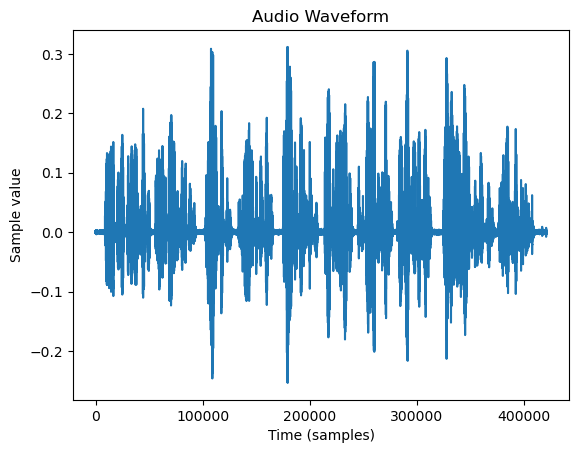

In [5]:
# Avec matplotlib
plt.plot(audio_data)
plt.xlabel('Time (samples)')
plt.ylabel('Sample value')
plt.title('Audio Waveform')
plt.show()

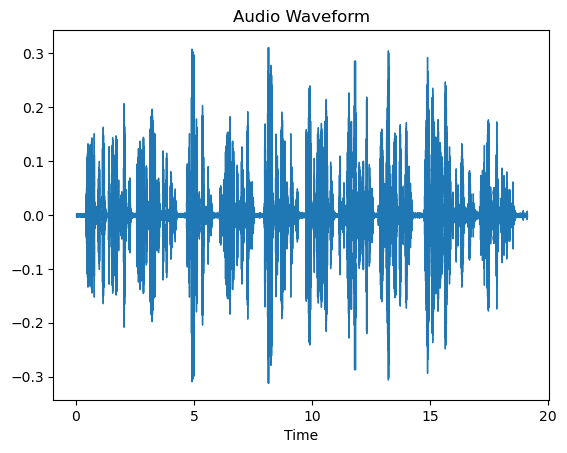

In [6]:
# Avec librosa.display
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.title('Audio Waveform')
plt.show()

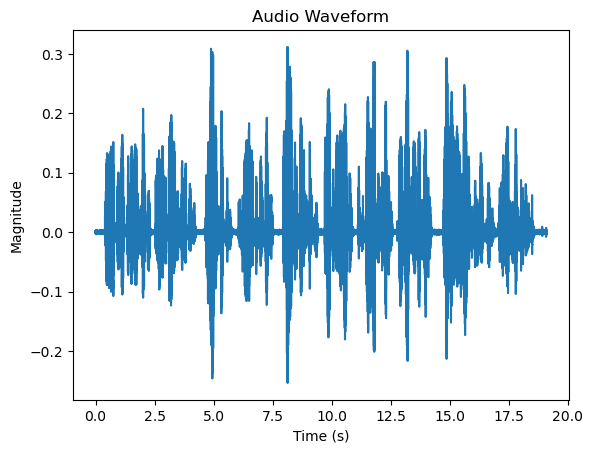

In [7]:
# En fonction du temps (vraiment en seconde)
# Calculer la durée
time = np.arange(0, len(audio_data)) / sample_rate

# plot l'audio (onde)
plt.plot(time, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.title('Audio Waveform')
plt.show()

## 2.3 Comment écouter un audio ?

In [8]:
# Avec IPython avec le bouton
Audio('preamble.wav')

# 3. Transformer un audio à dB spectrogram

## 3.1 Transformation fourier court-temps

In [9]:
# Appliquer short time fourier transformation 
sgram = librosa.stft(audio_data)

C:\Users\ngotr\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ngotr\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


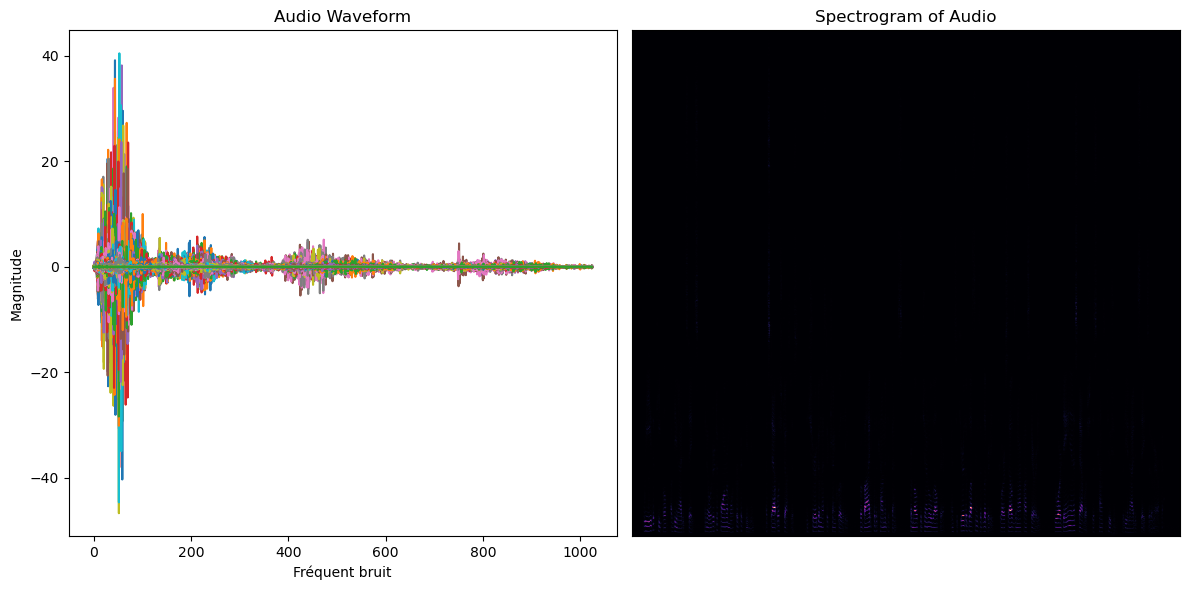

In [10]:
# Créer un figure qui contient 2 figures en une ligne
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the audio waveform using plt
ax1.plot(sgram)
ax1.set_xlabel('Fréquent bruit')
ax1.set_ylabel('Magnitude')
ax1.set_title('Audio Waveform')

# Create a spectrogram using librosa.display.specshow
librosa.display.specshow(sgram)
ax2.set_title('Spectrogram of Audio')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## 3.2 Transformation à valeur absolute

In [11]:
# use the mel-scale instead of raw frequency
sgram_mag, phase = librosa.magphase(sgram)

In [12]:
print('Phase en complexe :',phase)
print('Nombre de phase :',len(phase))
print('Shape :',phase.shape)                       # une vecteur une dimension 
print('Type :' , type(phase))                      # audio_data est un np.ndarray
print('Data type en un ndarray :',phase.dtype)     # type d'éléments dans audio_array est flottant

Phase en complexe : [[ 1.        +0.j          1.        +0.j         -1.        +0.j
  ... -1.        +0.j          1.        +0.j
   1.        +0.j        ]
 [ 0.20958567+0.97779024j -0.7639527 -0.6452723j   0.97002757-0.24299487j
  ...  0.21979259+0.97554666j -0.11984951-0.99279207j
  -0.08624698+0.99627376j]
 [-0.96543646-0.26063842j  0.8896107 +0.45671958j -0.9678416 -0.2515603j
  ...  0.02601741-0.9996615j  -0.11106633+0.993813j
   0.24344884-0.9699137j ]
 ...
 [ 0.95446116+0.29833525j -0.99622965-0.08675516j -0.40077552-0.9161763j
  ...  0.9146879 -0.4041609j   0.9693494 -0.24568611j
  -0.99986076+0.01668476j]
 [-0.9876771 +0.15650542j  0.36252403+0.9319744j   0.98693126+0.16114171j
  ... -0.9907048 +0.13602947j -0.0889433 +0.99603665j
   0.99813265+0.06108374j]
 [ 1.        +0.j         -1.        +0.j         -1.        +0.j
  ...  1.        +0.j         -1.        +0.j
  -1.        +0.j        ]]
Nombre de phase : 1025
Shape : (1025, 823)
Type : <class 'numpy.ndarray'>
Data t

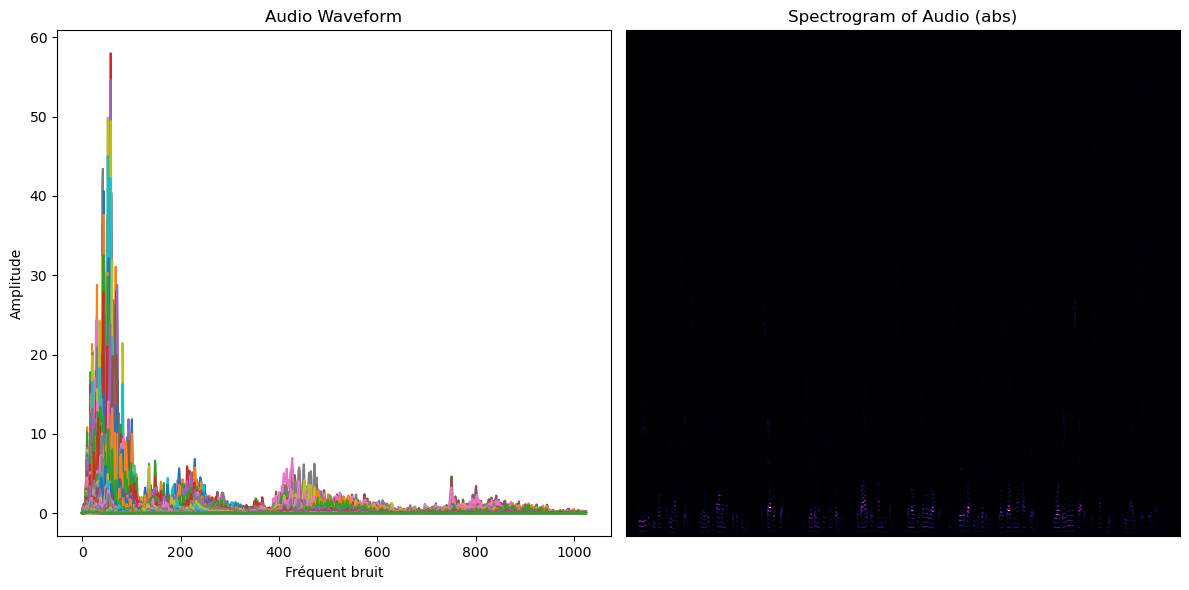

In [13]:
# Créer un figure qui contient 2 figures en une ligne
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the audio waveform using plt
ax1.plot(sgram_mag)
ax1.set_xlabel('Fréquent bruit')
ax1.set_ylabel('Amplitude')
ax1.set_title('Audio Waveform')

# Create a spectrogram using librosa.display.specshow
librosa.display.specshow(sgram_mag)
ax2.set_title('Spectrogram of Audio (abs)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

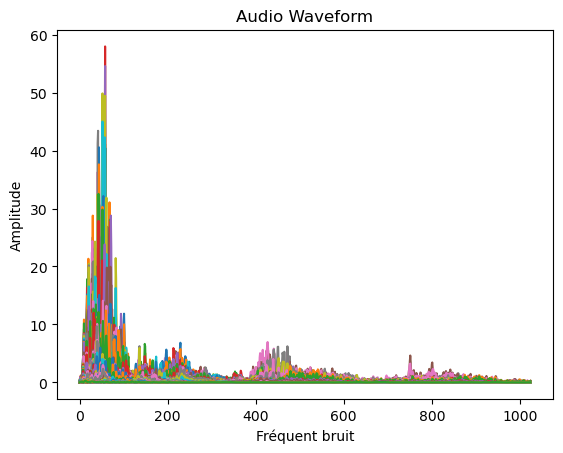

In [14]:
# Ou on peut faire la meme chose avec fonction abs()
abs_sgram = abs(sgram)
# plot l'audio (onde)
plt.plot(abs_sgram)
plt.xlabel('Fréquent bruit')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

## 3.3 Mel scaling

In [15]:
# Scaling en Mel
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)

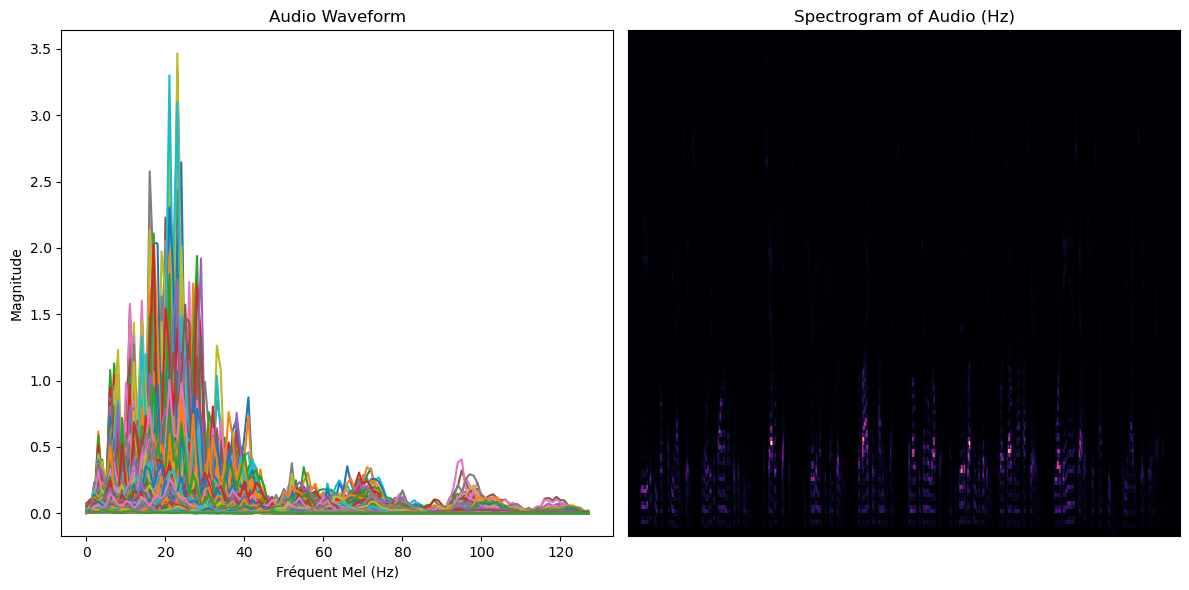

In [16]:
# Créer un figure qui contient 2 figures en une ligne
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the audio waveform using plt
ax1.plot(mel_scale_sgram)
ax1.set_xlabel('Fréquent Mel (Hz)')
ax1.set_ylabel('Magnitude')
ax1.set_title('Audio Waveform')

# Create a spectrogram using librosa.display.specshow
librosa.display.specshow(mel_scale_sgram)
ax2.set_title('Spectrogram of Audio (Hz)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## 3.4 Tranformation logarithmique 

In [17]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)

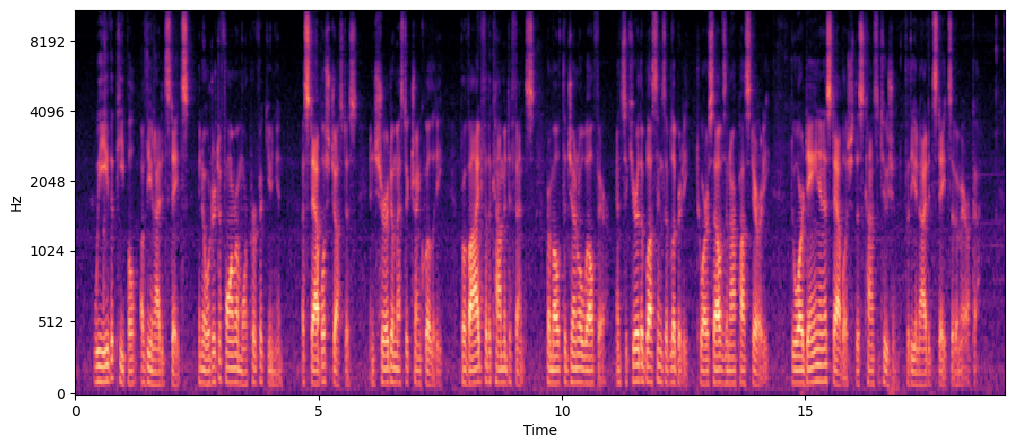

In [30]:
plt.figure(figsize=(12, 5))
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')

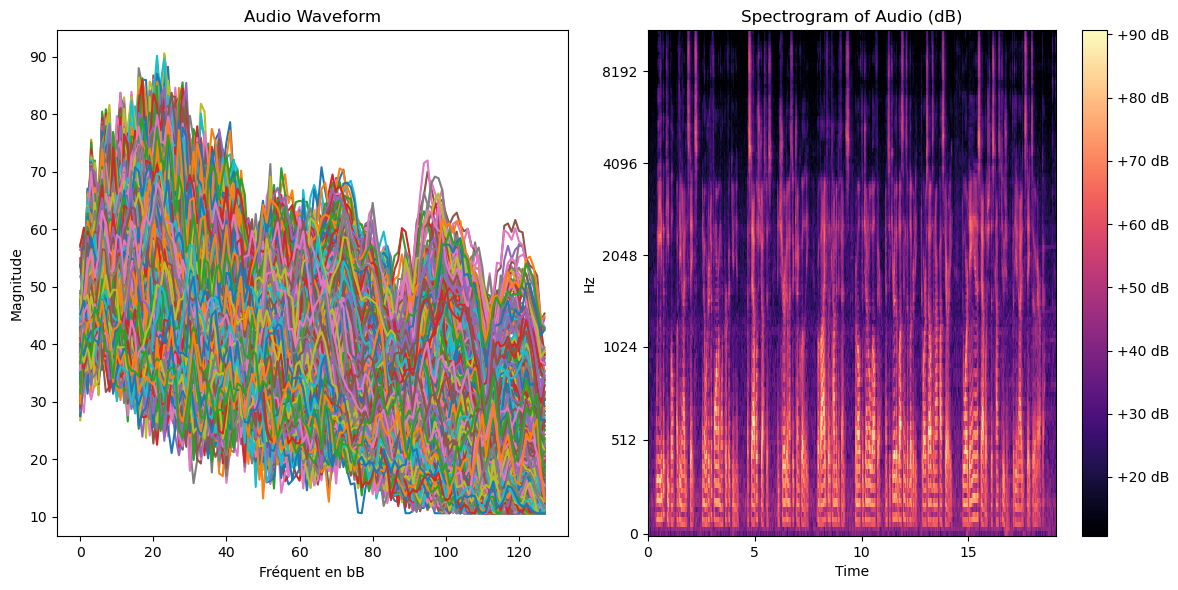

In [19]:
# Créer un figure qui contient 2 figures en une ligne
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the audio waveform using plt
ax1.plot(mel_sgram)
ax1.set_xlabel('Fréquent en bB')
ax1.set_ylabel('Magnitude')
ax1.set_title('Audio Waveform')

# Create a spectrogram using librosa.display.specshow
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
ax2.set_title('Spectrogram of Audio (dB)')
plt.colorbar(format='%+2.0f dB')
# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [20]:
len(mel_sgram)
print(np.shape(mel_sgram))
print(mel_sgram)

(128, 823)
[[33.495605 37.444702 32.646458 ... 40.104164 38.017963 36.770927]
 [36.637917 42.41541  41.660473 ... 38.134045 40.121002 41.956154]
 [37.38486  37.57079  38.34752  ... 40.871    43.777058 39.89363 ]
 ...
 [10.632774 10.632774 10.632774 ... 10.632774 26.943577 31.404404]
 [10.632774 10.632774 10.632774 ... 10.632774 17.881279 21.7155  ]
 [10.632774 10.632774 10.632774 ... 10.632774 12.862549 17.811691]]


In [21]:
# define function to transform audio to spectrogram and dB scaling
def audio_to_dB_spectrogram(audio_file):
    # Load audio fine
    audio_data, sample_rate = librosa.load(audio_file)
    # Using fourier tranformation
    sgram = librosa.stft(audio_data)
    # magphase the sgram
    sgram_mag, _ = librosa.magphase(sgram)
    # use the mel-scale instead of raw frequency
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    # use the decibel scale to get the final Mel Spectrogram
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    # Show the figure in full-screen mode
    librosa.display.specshow(mel_sgram, sr=sample_rate)
     # Activer le mode plein écran
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    
    # Enregistrer le spectrogramme en tant qu'image
    plt.savefig(audio_file[:-4], bbox_inches='tight', pad_inches=0)
    

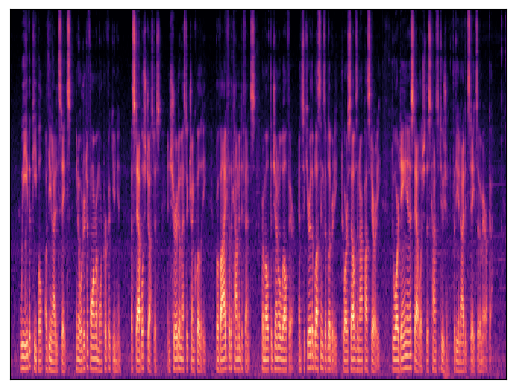

In [22]:
# Test fonction audio à spectrogram en dB
audio_to_dB_spectrogram('preamble.wav')

# 4. Transformation spectrogram dB en audio

In [27]:
def spectrogram_to_audio(spectrogram_file):
    # Load the saved spectrogram image
    image = plt.imread(spectrogram_file)

    # Inverse the dB scaling to get the Mel scale spectrogram
    mel_scale_sgram = librosa.db_to_amplitude(image)

    # Inverse the Mel scale spectrogram to get the magnitude spectrogram
    sgram_mag = librosa.feature.inverse.mel_to_stft(mel_scale_sgram)

    # Inverse the magnitude spectrogram to get the time-domain audio signal
    audio_signal = librosa.istft(sgram_mag)

    return audio_signal


